In [1]:
#removing warnings about future deprecated pandas module
import warnings
warnings.filterwarnings('ignore')

import mysql.connector as sql
import pandas as pd
import numpy as np
import plotly.offline as plty
plty.init_notebook_mode()
from ggplot import *

## Data retrieval

In [2]:
db_connection = sql.connect(host='104.197.253.225', database='secdb', user='cs572', password='cs572')
db_cursor = db_connection.cursor()

pd.read_sql("SELECT COUNT(*) FROM all_physical", db_connection)

COUNT(*)
0    946719

In [3]:
query = 'SELECT * FROM all_physical'
raw_data = pd.read_sql(query, db_connection)
raw_data.shape

(946719, 53)

## Data cleaning

In [ ]:
raw_data.tail()

In [4]:
# split day and time
dates = raw_data['Timestamp'].str.strip()
dates = dates.str.split(' ', 1, expand=True)

# days of the experiment
dates[0].unique()

array(['28/12/2015', '29/12/2015', '30/12/2015', '31/12/2015', '1/1/2016',
       '2/1/2016', '22/12/2015', '23/12/2015', '24/12/2015', '25/12/2015',
       '26/12/2015', '27/12/2015'], dtype=object)

In [5]:
# remplacing dates by the day number in the experiment
days = {
    '22/12/2015' : 1,
    '23/12/2015' : 2,
    '24/12/2015' : 3,
    '25/12/2015' : 4,
    '26/12/2015' : 5,
    '27/12/2015' : 6,
    '28/12/2015' : 7,
    '29/12/2015' : 8,
    '30/12/2015' : 9,
    '31/12/2015' : 10,
    '1/1/2016' : 11,
    '2/1/2016' : 12
}
dates[0] = dates[0].replace(days)

In [6]:
# inserting Day and Time columns in lieu of Timestamp
data = raw_data
data['Day'] = dates[0]
data['Time'] = dates[1]
cols = data.columns.tolist()
cols = cols[-2:] + cols[:-2]
data = data[cols]
del data['Timestamp']

# sorting data in chronological order
data = data.sort_values(['Day','Time'], ascending=[True,True])

In [7]:
data['EVENT'].unique()

array(['Normal', 'Attack', 'A ttack'], dtype=object)

In [8]:
# remplacing dates by the day number in the experiment
events = {
    'Normal' : 0,
    'Attack' : 1,
    'A ttack' : 1
}
data['EVENT'] = data['EVENT'].replace(events)

In [9]:
# cleaning index
data = data.reset_index(drop=True)

# adding a sample number for plotting purpose
data['Sample'] = data.index
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]
data.head()


Sample  Day         Time    FIT101    LIT101 MV101 P101 P102    AIT201  \
0       0    1  10:00:00 PM  2.630433  501.7288     2    2    1  261.3753   
1       1    1  10:00:01 PM  2.617622  501.6895     2    2    1  261.3753   
2       2    1  10:00:02 PM  2.608974   501.454     2    2    1  261.3753   
3       3    1  10:00:03 PM  2.598405  501.8858     2    2    1  261.3753   
4       4    1  10:00:04 PM  2.575986  501.8858     2    2    1  261.3753   

     AIT202  ...  P501 P502    PIT501    PIT502    PIT503    FIT601 P601 P602  \
0  8.336837  ...     2    1  254.0855  1.041233  193.1396  6.41E-05    1    1   
1  8.336837  ...     2    1  254.0695  1.041233  193.1396  6.41E-05    1    1   
2  8.338439  ...     2    1  253.9573  1.041233  192.9794  6.41E-05    1    1   
3   8.33908  ...     2    1  253.9253  1.041233  192.9794  6.41E-05    1    1   
4   8.33908  ...     2    1  253.9253  1.041233  192.9794  6.41E-05    1    1   

  P603 EVENT  
0    1     0  
1    1     0  
2    1     0  
3    1     0  
4    1     0  

[5 rows x 55 columns]

In [10]:
features = ['FIT101', 'LIT101', 'MV101', 'P101', 'P102',
            'AIT201', 'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206',
            'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302',
            'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401',
            'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503',
            'FIT601', 'P601', 'P602', 'P603']

# Classic dynamic between pump, valve and tank level

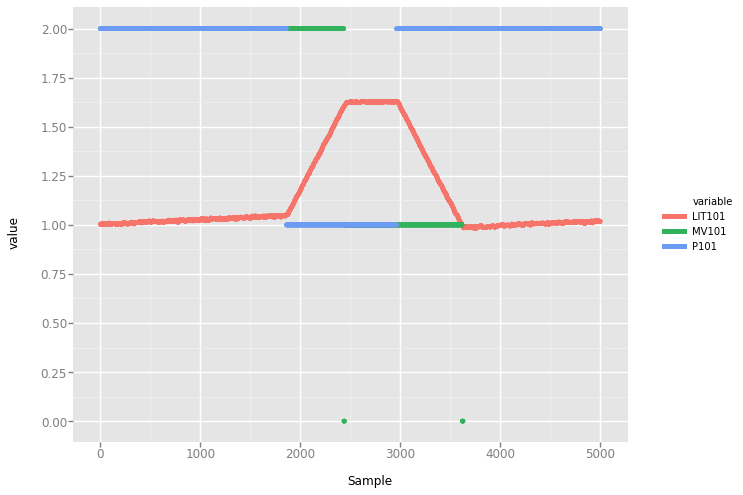

In [28]:
data_p1 = data[['Sample','P101','MV101','LIT101']][0:5000]
data_p1['LIT101'] = data_p1['LIT101'].astype(float).apply(lambda x: x/500.0)
plot = ggplot(aes(x='Sample', y='value', color='variable'), pd.melt(data_p1, id_vars='Sample')) +\
    geom_point()
plot.show()

# Relation between ORP fluctuations and attacks

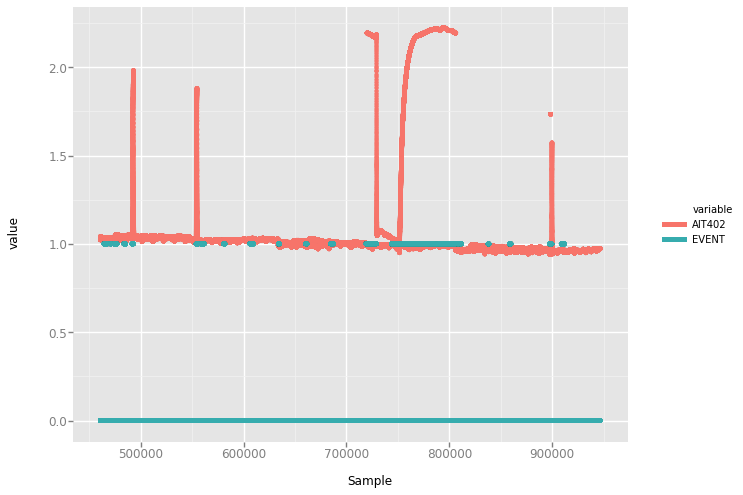

In [85]:
data_p2 = data[['Sample','EVENT','AIT402']][data['Day']>=7]
data_p2['AIT402'] = data_p2['AIT402'].astype(float).apply(lambda x: x/150.0)
plot = ggplot(aes(x='Sample', y='value', color='variable'), pd.melt(data_p2, id_vars='Sample')) +\
    geom_point()
plot.show()

# Investigating a weird value drop during day 1

### Observed on several processes

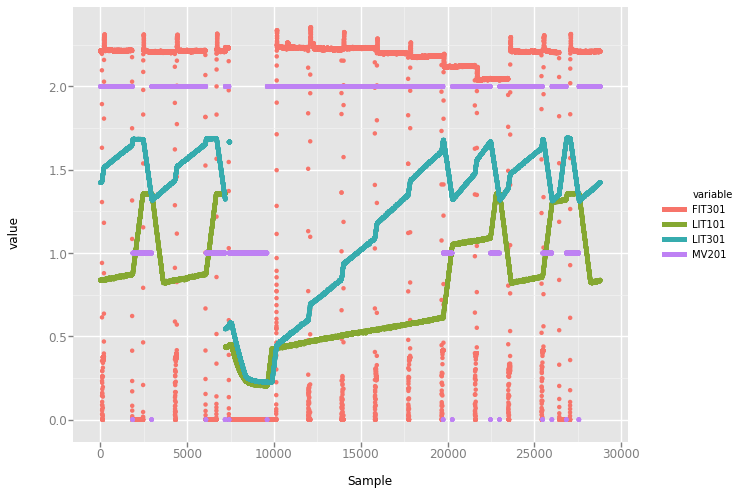

In [27]:
data_p4 = data[['Sample','MV201','LIT101','LIT301','FIT301']][data['Day']==1]
data_p4['LIT101'] = data_p4['LIT101'].astype(float).apply(lambda x: x/600.0)
data_p4['LIT301'] = data_p4['LIT301'].astype(float).apply(lambda x: x/600.0)
plot = ggplot(aes(x='Sample', y='value', color='variable'), pd.melt(data_p4, id_vars='Sample')) +\
    geom_point()
plot.show()

### Seems related to the water flow (flow, tank level, valve)

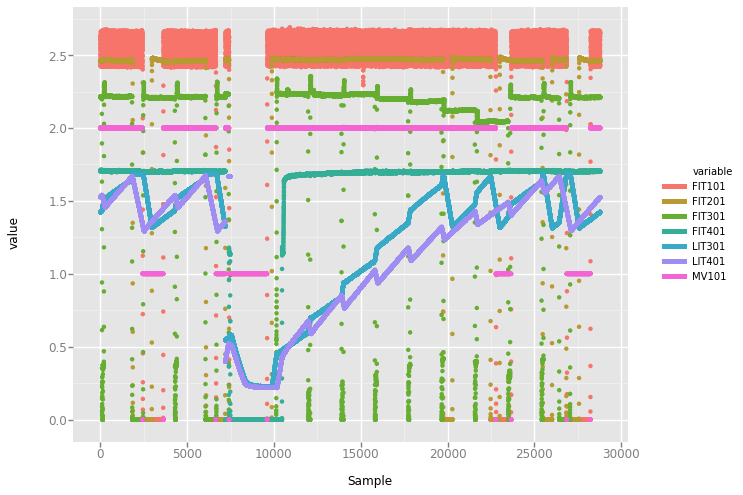

In [83]:
data_p4 = data[['Sample','MV101','FIT101','FIT201','LIT301','FIT301','LIT401','FIT401']][data['Day']==1]
data_p4['LIT301'] = data_p4['LIT301'].astype(float).apply(lambda x: x/600.0)
data_p4['LIT401'] = data_p4['LIT401'].astype(float).apply(lambda x: x/600.0)
plot = ggplot(aes(x='Sample', y='value', color='variable'), pd.melt(data_p4, id_vars='Sample')) +\
    geom_point()
plot.show()

### Isolating the timestamps

It seems to trace back as early as process 1.

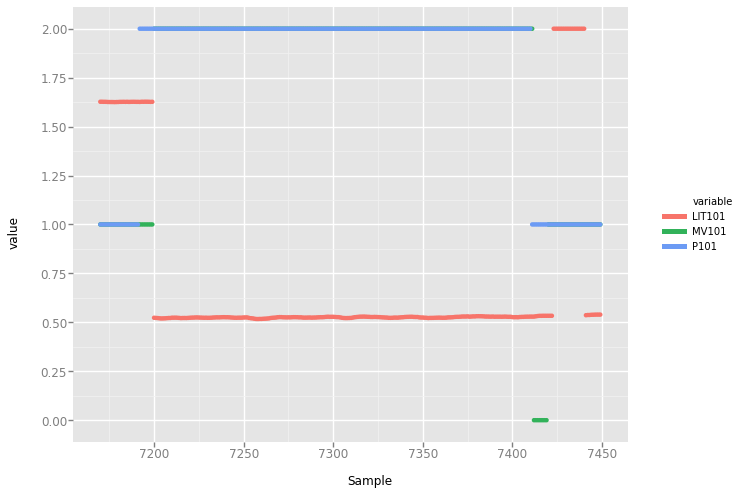

In [84]:
data_p1 = data[['Sample','P101','MV101','LIT101']][7170:7450]
data_p1['LIT101'] = data_p1['LIT101'].astype(float).apply(lambda x: x/500.0)
plot = ggplot(aes(x='Sample', y='value', color='variable'), pd.melt(data_p1, id_vars='Sample')) +\
    geom_point()
plot.show()

We observed a dramatic drop of water tank level at timestamp 7200, from 813 to 261. This does not seem physically realistic.
=> What should we do with that information? Not take day 1 into account?

In [36]:
data[['Sample','LIT101']][7195:7205]

Sample    LIT101
7195    7195  813.5134
7196    7196  813.4349
7197    7197  813.3564
7198    7198  813.1209
7199    7199  813.3171
7200    7200  261.5804
7201    7201  261.1879
7202    7202  260.9131
7203    7203   260.285
7204    7204  259.8925

# Investigating backup pump P204 being active

### Initial observation

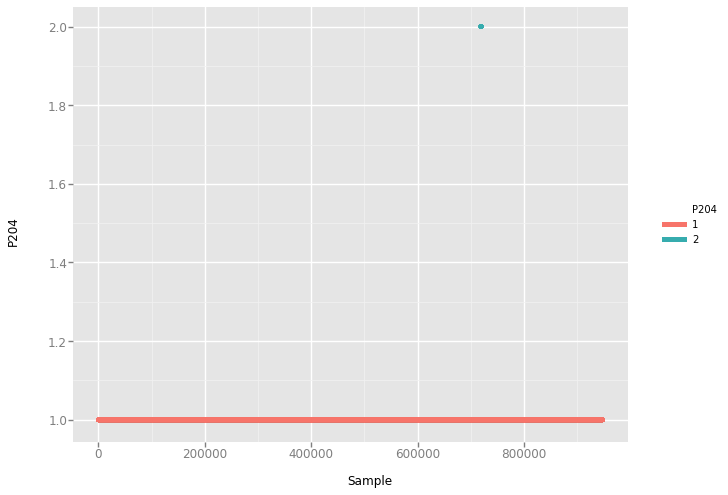

In [55]:
plot = ggplot(aes(x='Sample', y='P204', color='P204'), data) +\
    geom_point()
plot.show()

In [49]:
data[['Sample']][data['P204']=='2']

Sample
718936  718936
718938  718938
718940  718940
718942  718942
718944  718944
718946  718946
718948  718948
718950  718950
718952  718952
718954  718954
718956  718956
718958  718958
718960  718960
718962  718962
718964  718964
718966  718966
718968  718968
718970  718970
718972  718972
718974  718974
718976  718976
718978  718978
718980  718980
718982  718982
718984  718984
718986  718986
718988  718988
718990  718990
718992  718992
718994  718994
718996  718996
718998  718998
719000  719000
719002  719002
719004  719004
719006  719006
719008  719008
719010  719010
719012  719012
719014  719014
719016  719016
719018  719018
719020  719020
719022  719022
719024  719024
719026  719026
719028  719028
719030  719030
719032  719032
719034  719034
719036  719036
719038  719038
719040  719040
719042  719042
719044  719044
719046  719046

### Comparing main pump P203 with backup pump P204 during those timestamps

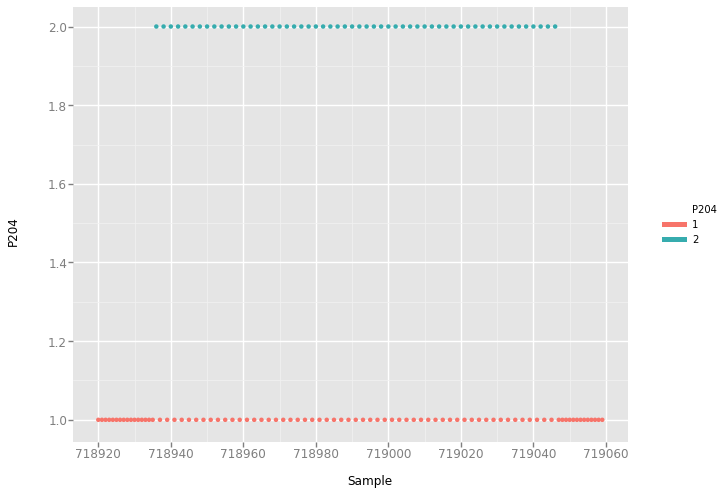

In [64]:
plot = ggplot(aes(x='Sample', y='P204', color='P204'), data[718920:719060]) +\
    geom_point()
plot.show()

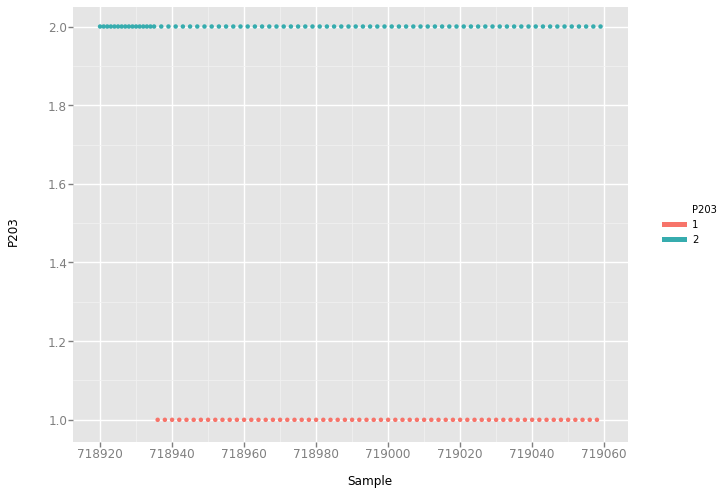

In [63]:
plot = ggplot(aes(x='Sample', y='P203', color='P203'), data[718920:719060]) +\
    geom_point()
plot.show()

# Investigating conductivity in P2

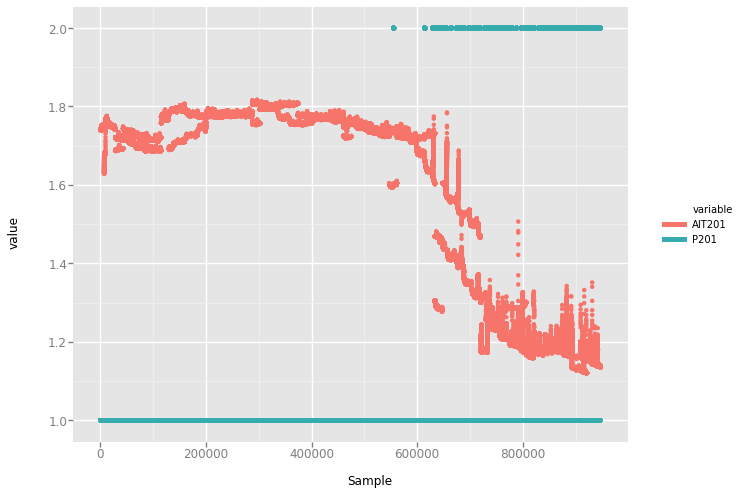

In [65]:
data_p2 = data[['Sample','AIT201','P201']]
data_p2['AIT201'] = data_p2['AIT201'].astype(float).apply(lambda x: x/150.0)
plot = ggplot(aes(x='Sample', y='value', color='variable'), pd.melt(data_p2, id_vars='Sample')) +\
    geom_point()
plot.show()

### Apparently, when conductivity drops under a certain threshold (around 1.6 * 150 = 240), the NaCl pump gets active

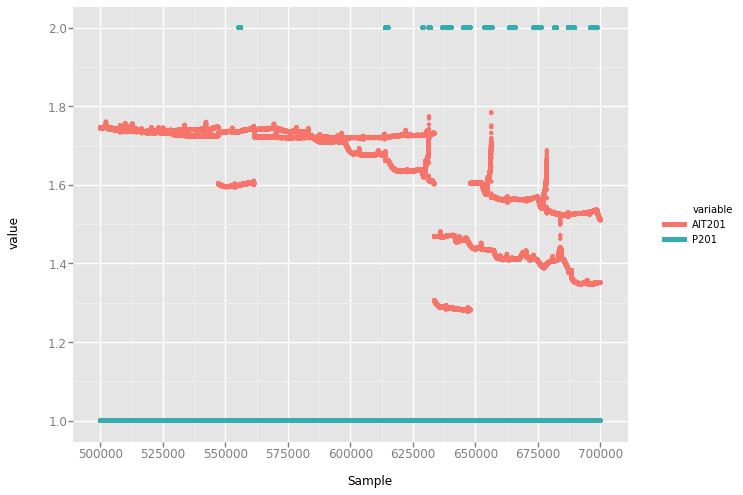

In [66]:
data_p2 = data[['Sample','AIT201','P201']][500000:700000]
data_p2['AIT201'] = data_p2['AIT201'].astype(float).apply(lambda x: x/150.0)
plot = ggplot(aes(x='Sample', y='value', color='variable'), pd.melt(data_p2, id_vars='Sample')) +\
    geom_point()
plot.show()

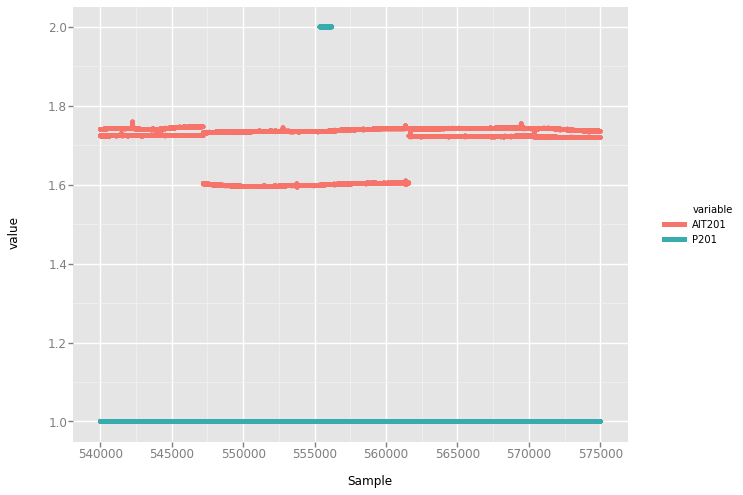

In [68]:
#zooming further
data_p2 = data[['Sample','AIT201','P201']][540000:575000]
data_p2['AIT201'] = data_p2['AIT201'].astype(float).apply(lambda x: x/150.0)
plot = ggplot(aes(x='Sample', y='value', color='variable'), pd.melt(data_p2, id_vars='Sample')) +\
    geom_point()
plot.show()

### A new question arises: are there two measures taken at once?

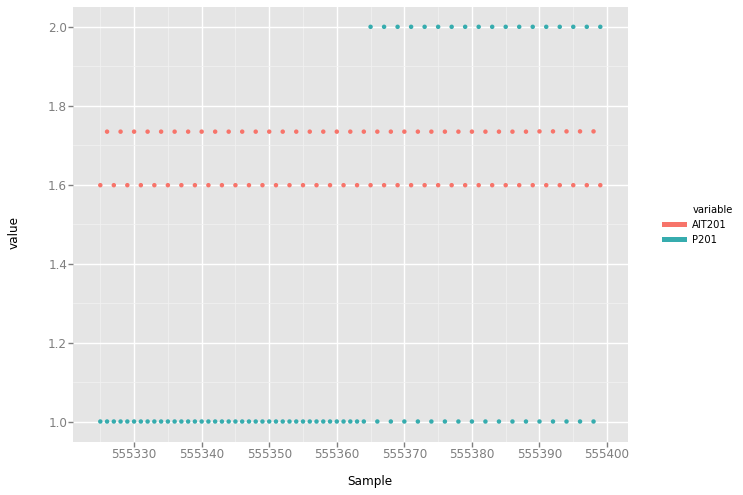

In [82]:
#zooming further
data_p2 = data[['Sample','AIT201','P201']][555325:555400]
data_p2['AIT201'] = data_p2['AIT201'].astype(float).apply(lambda x: x/150.0)
plot = ggplot(aes(x='Sample', y='value', color='variable'), pd.melt(data_p2, id_vars='Sample')) +\
    geom_point()
plot.show()

Documentation about the sensor found at http://www.mwt.no/easyLinedatasheet.pdf did not help understanding this phenomenon...

# Plotting attacks over time

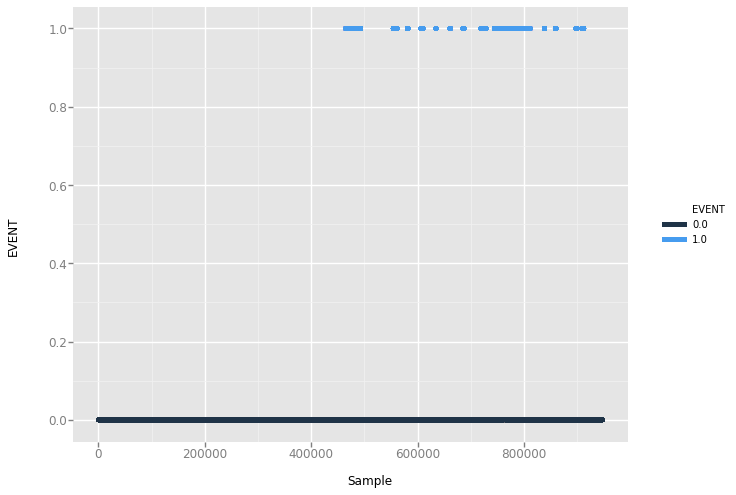

In [16]:
plot = ggplot(aes(x='Sample', y='EVENT', color='EVENT'), data=data) + \
    geom_point()
plot.show()

### All plots for the full experiment period

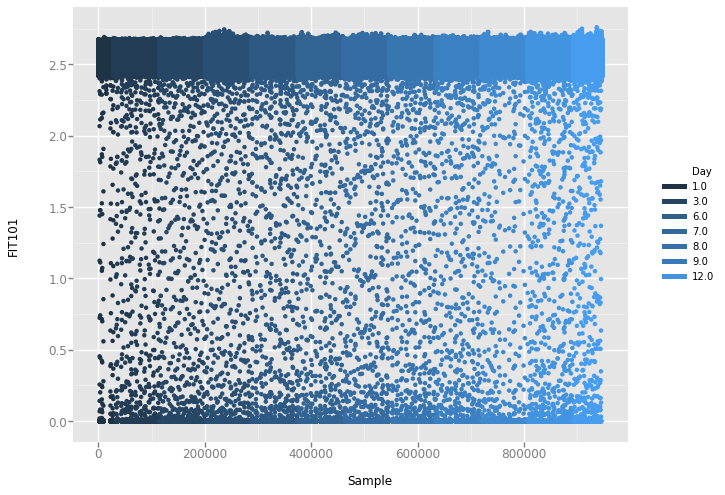

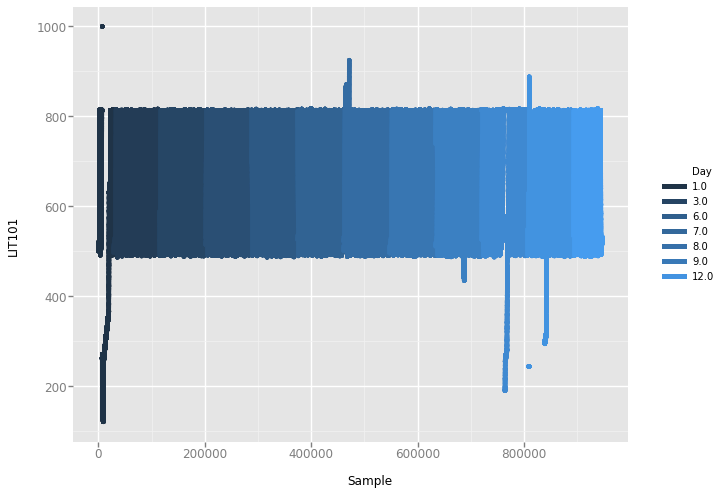

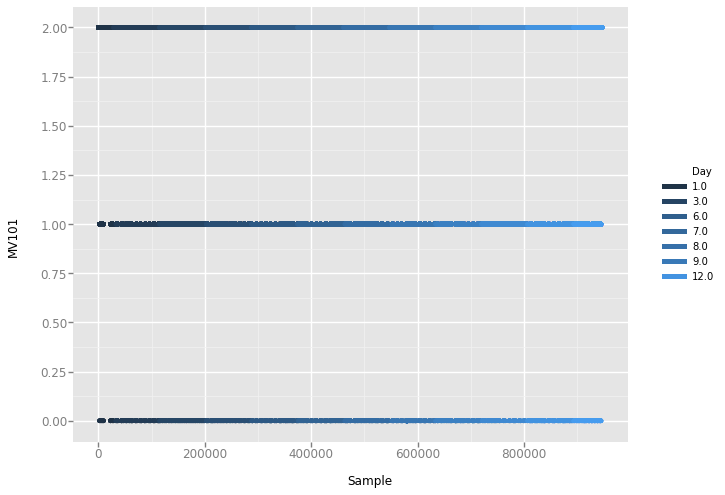

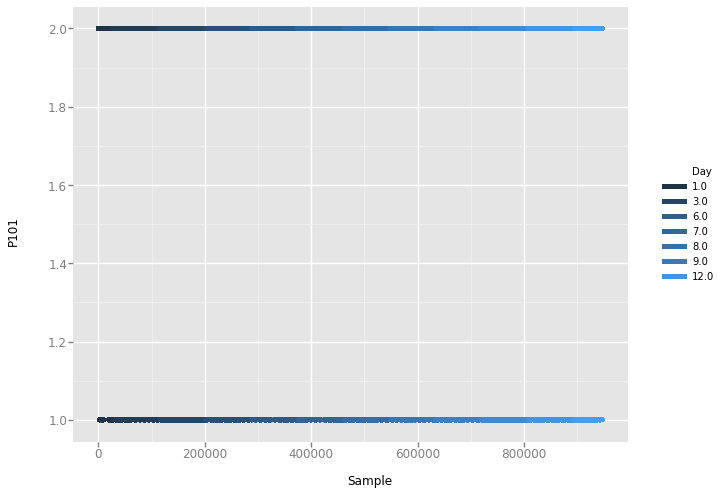

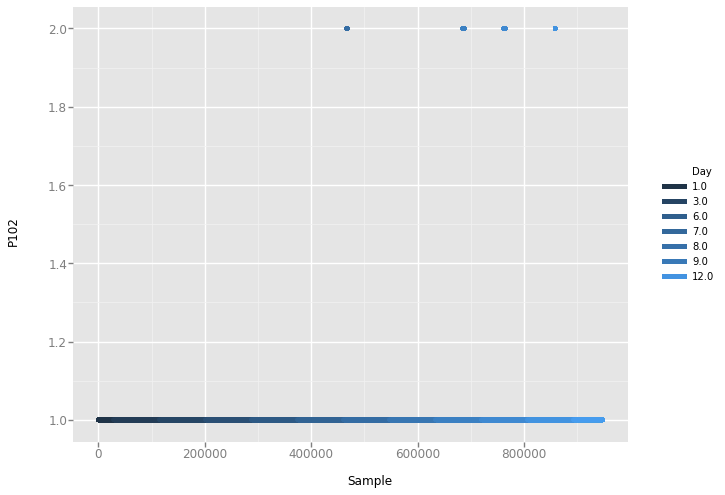

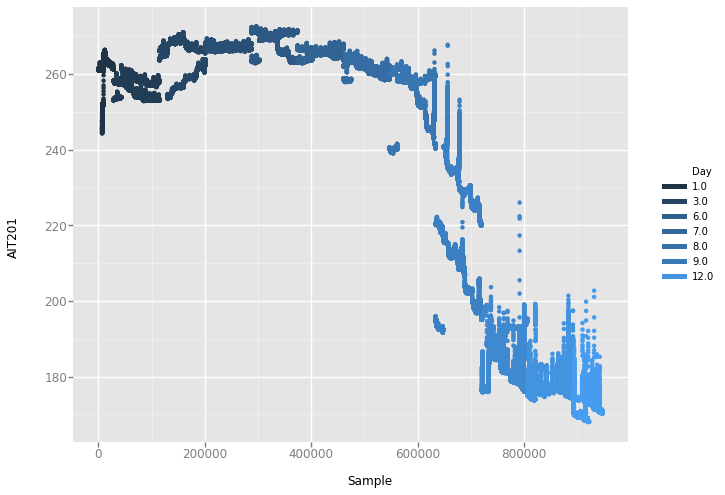

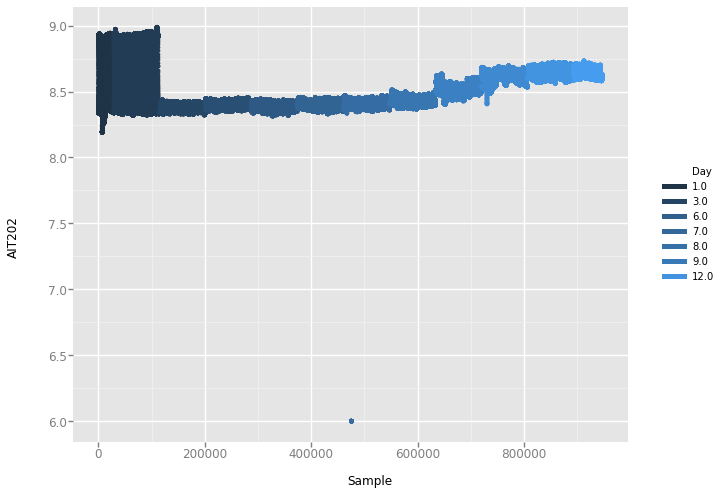

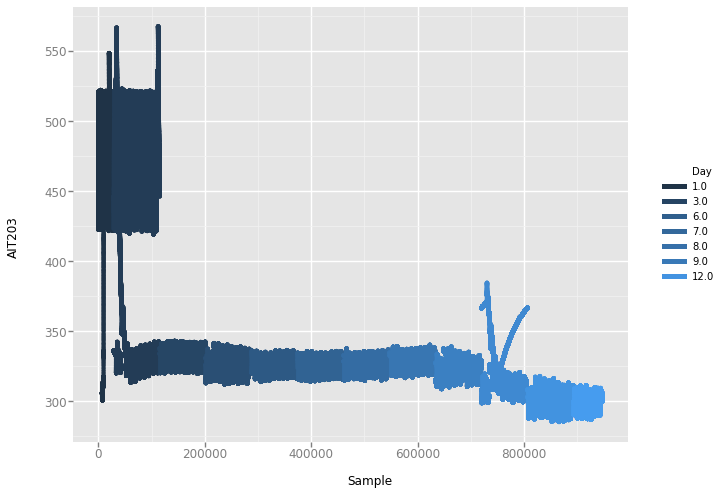

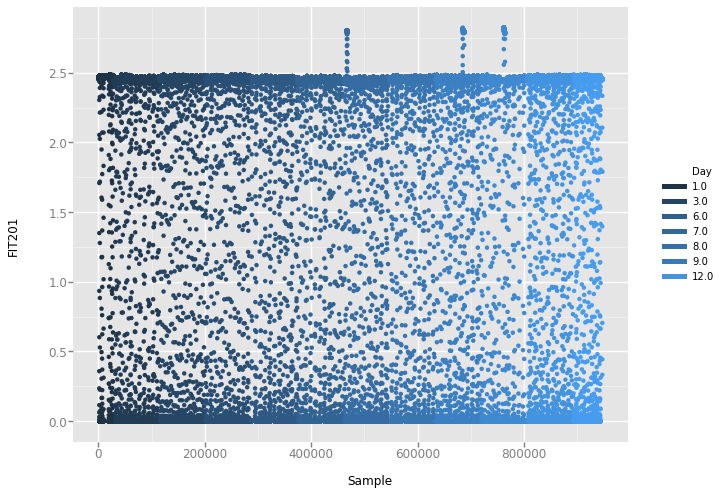

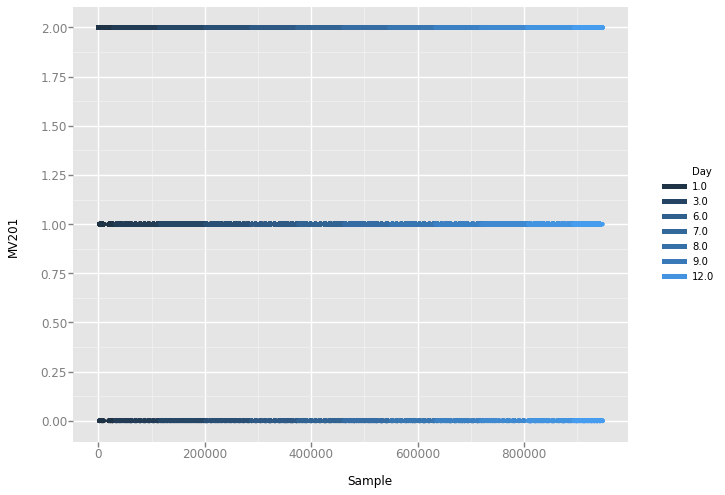

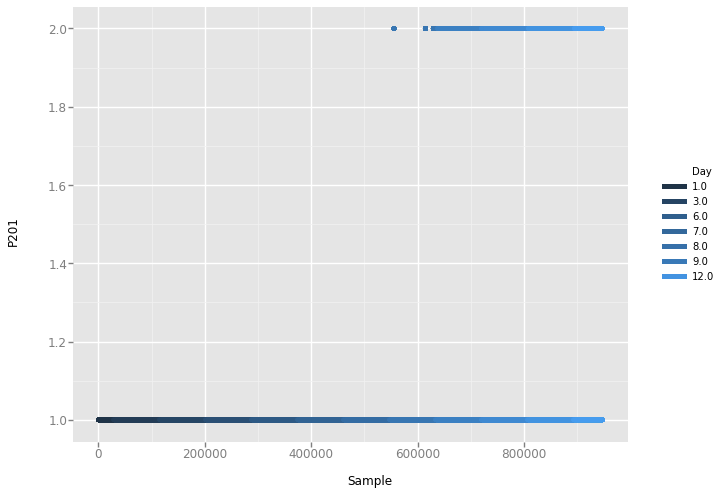

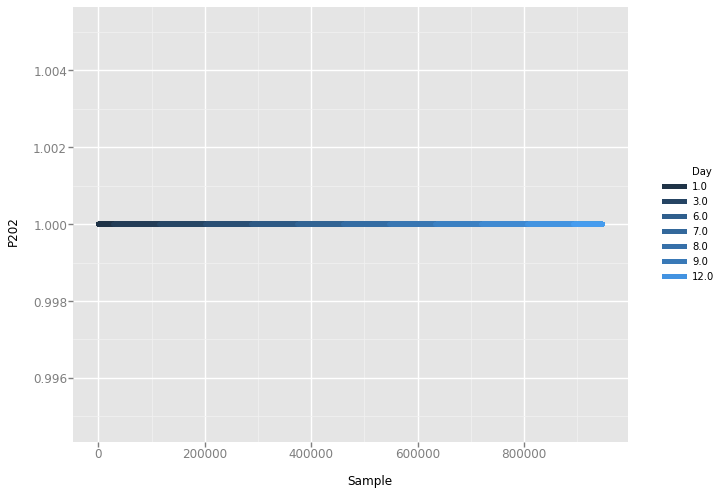

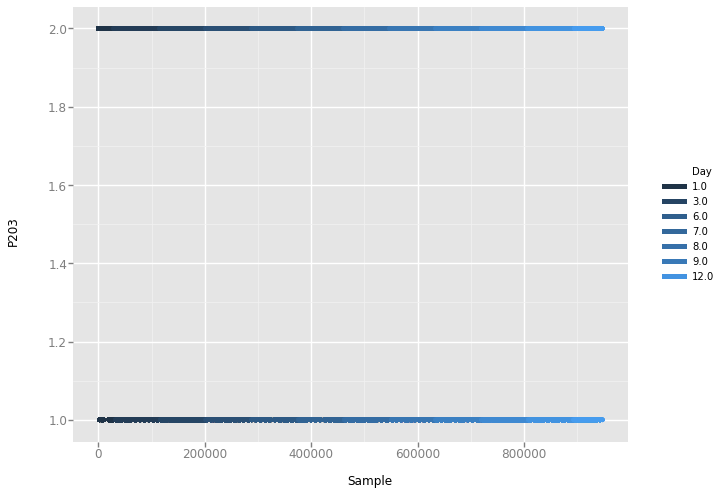

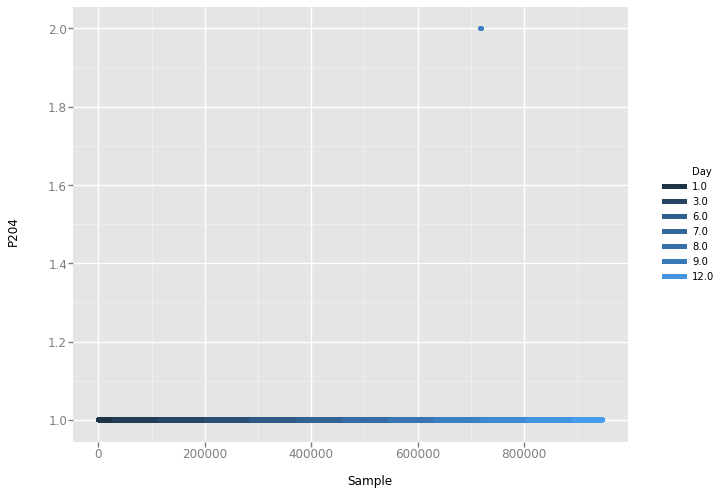

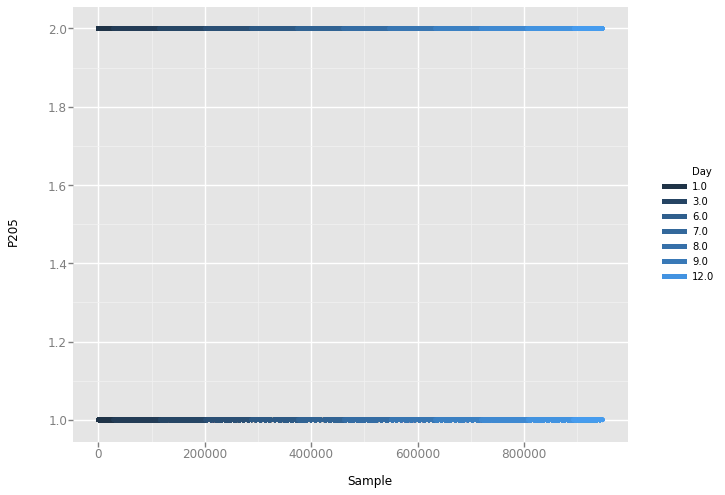

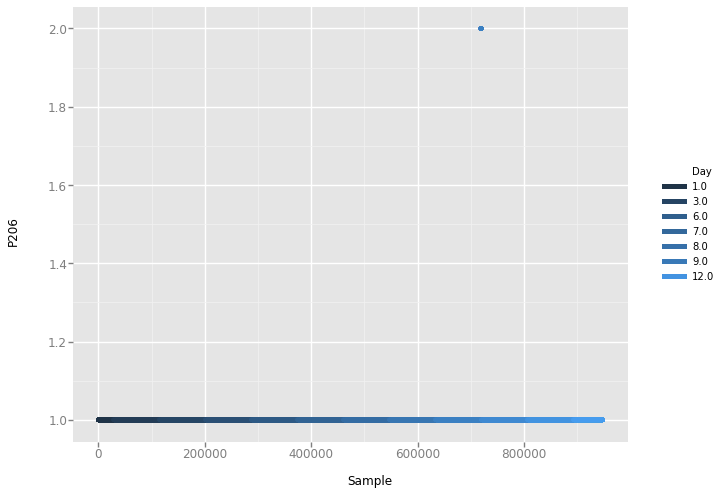

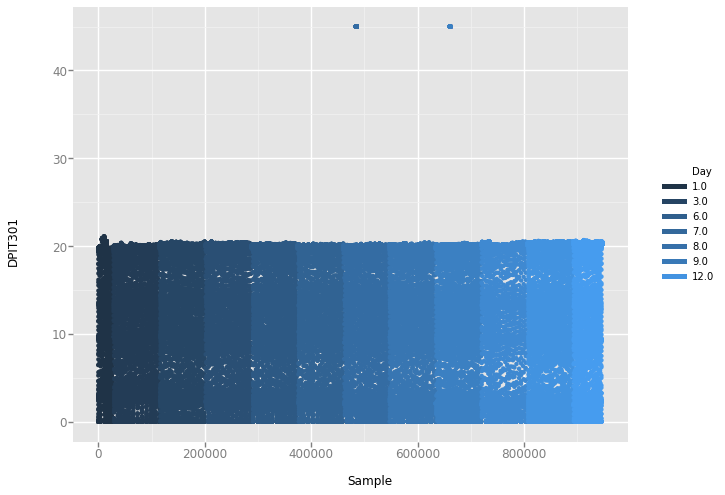

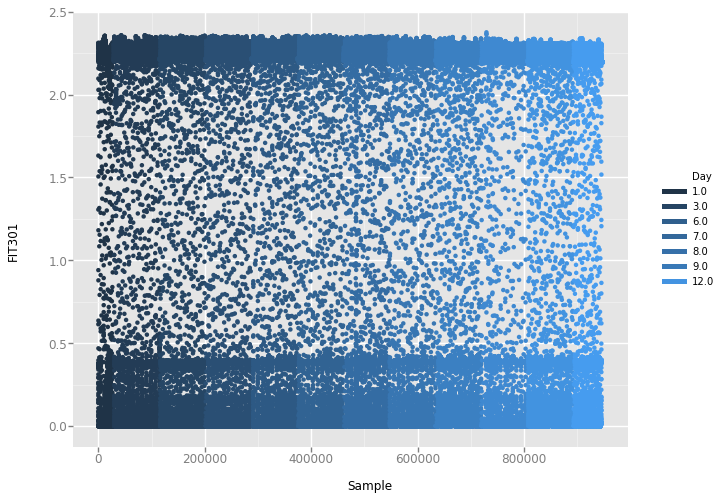

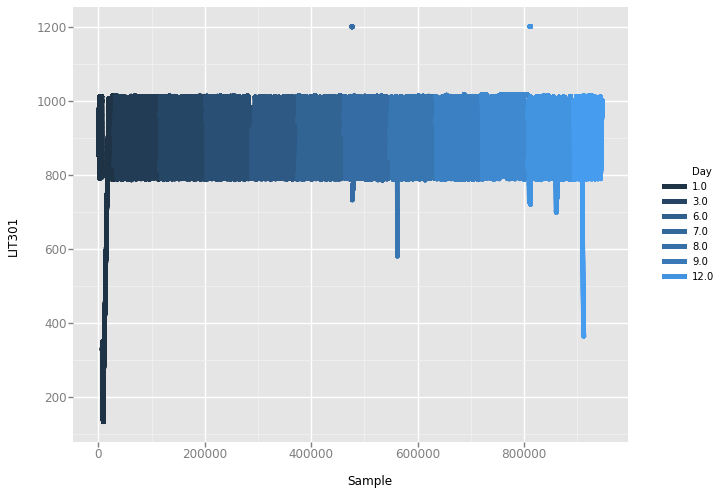

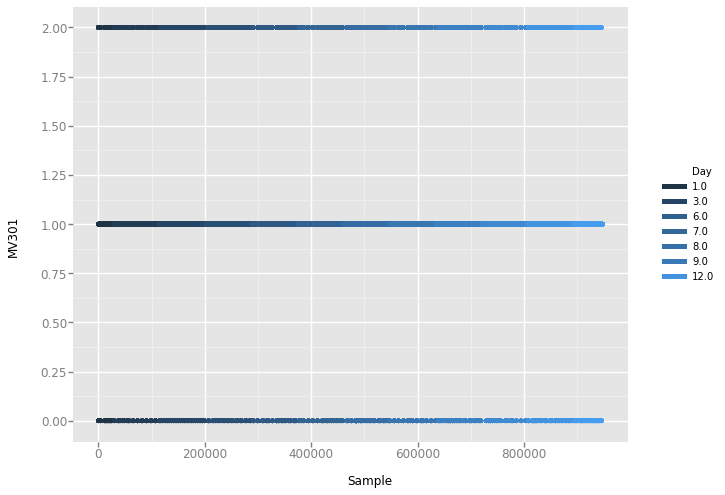

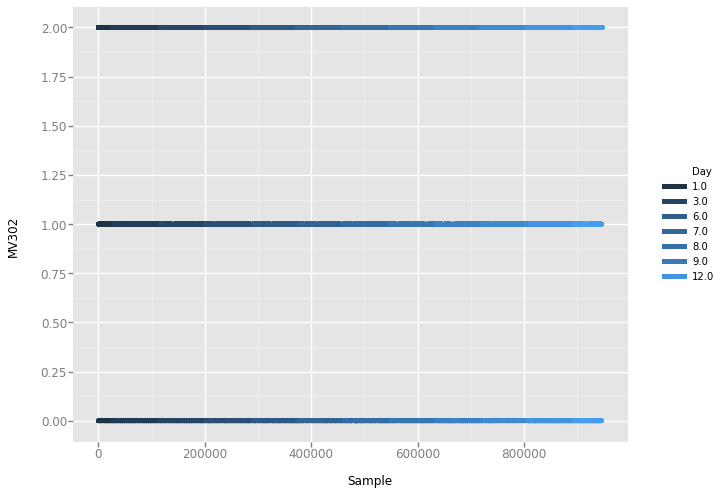

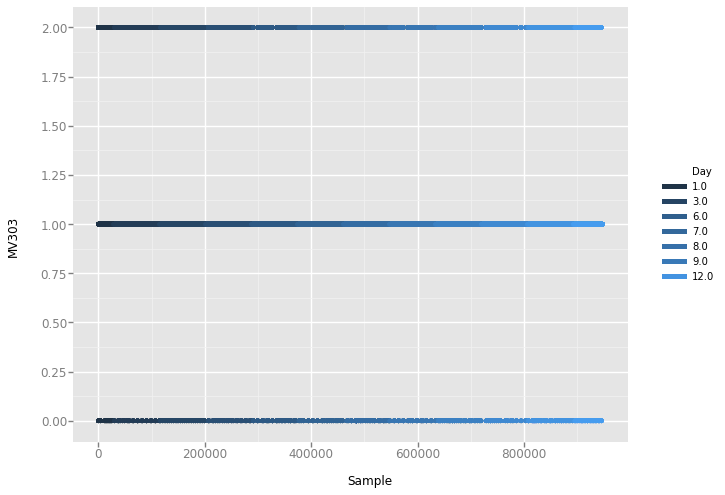

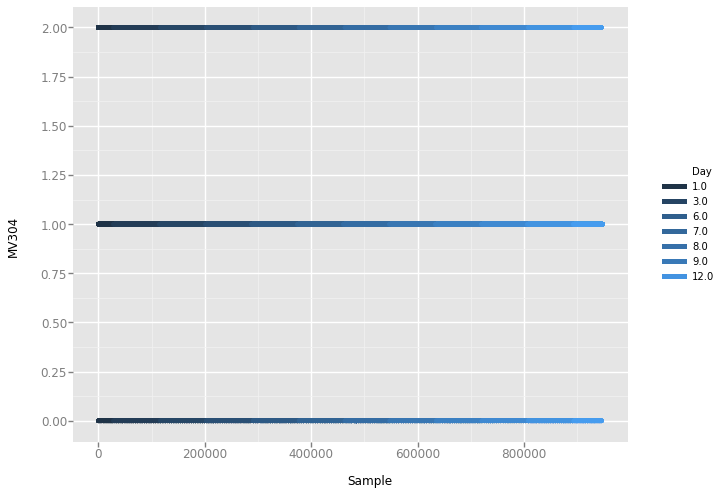

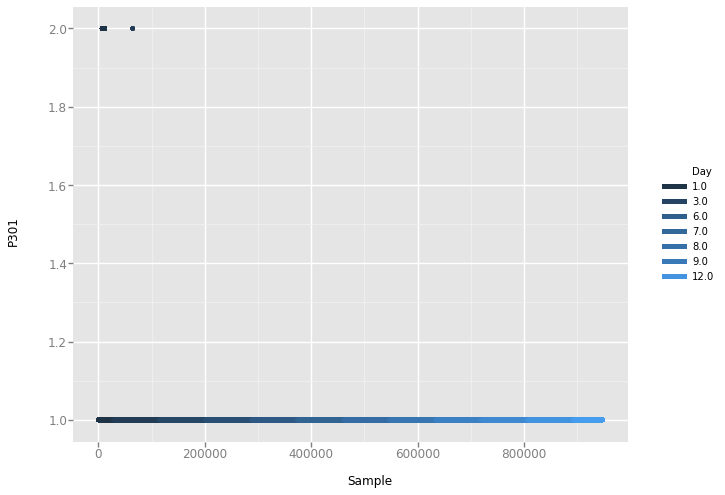

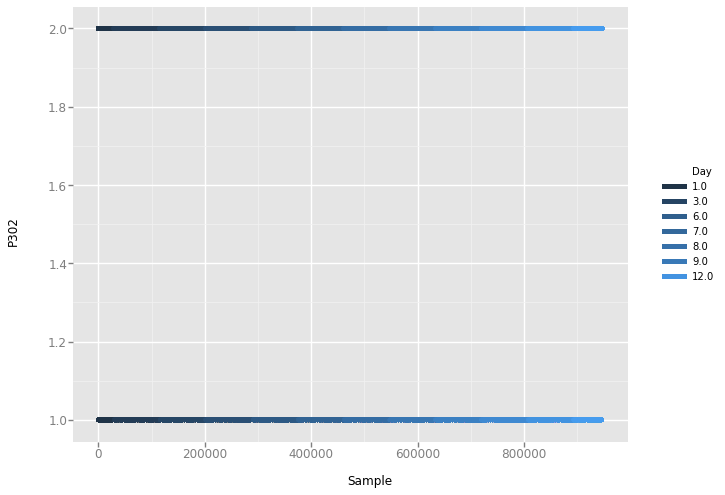

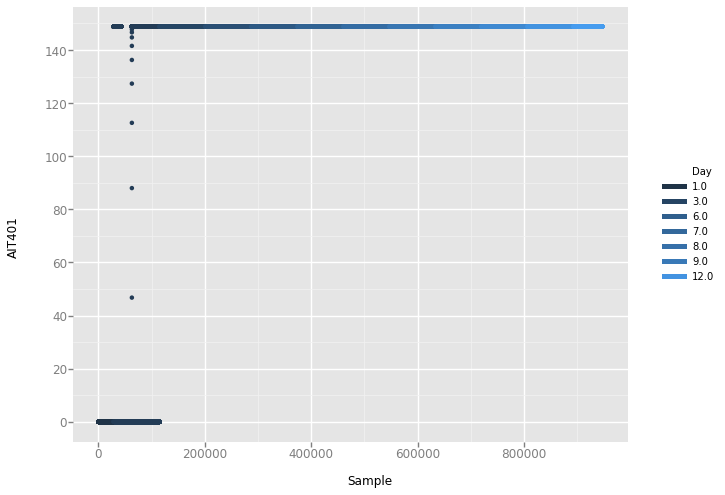

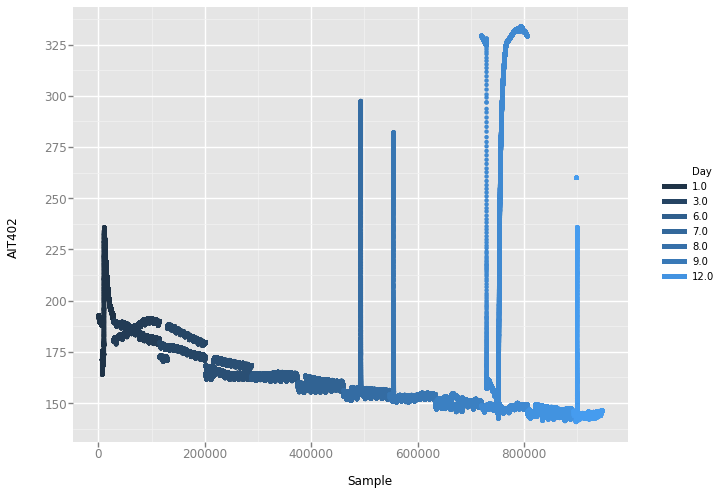

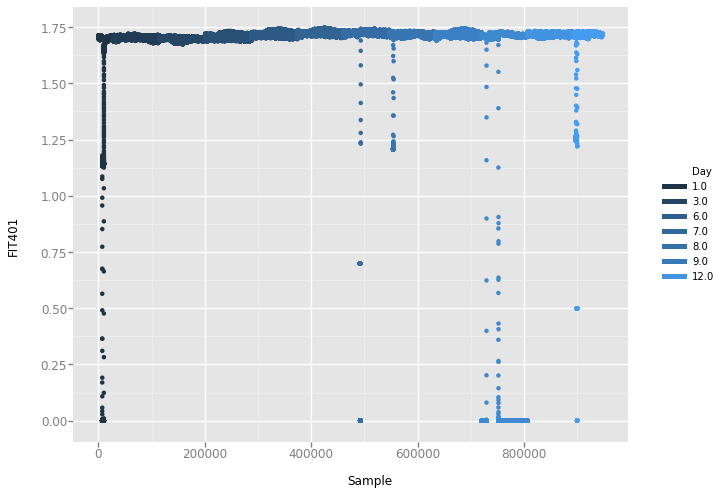

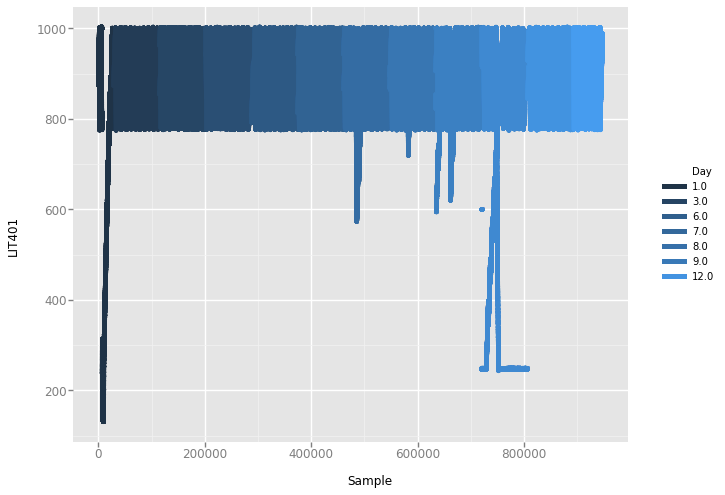

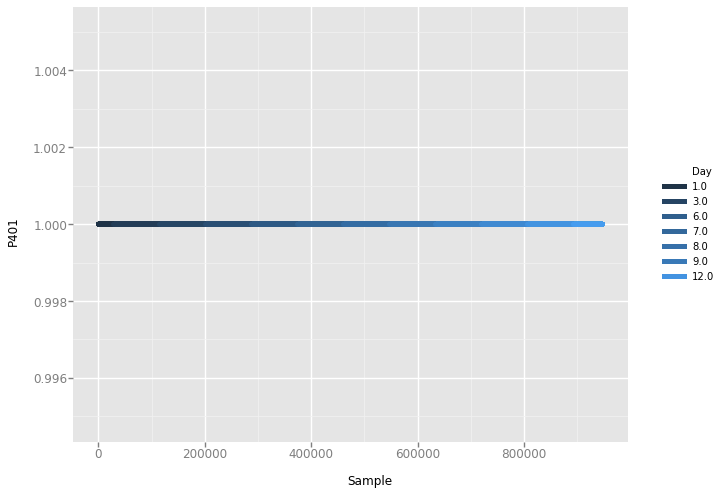

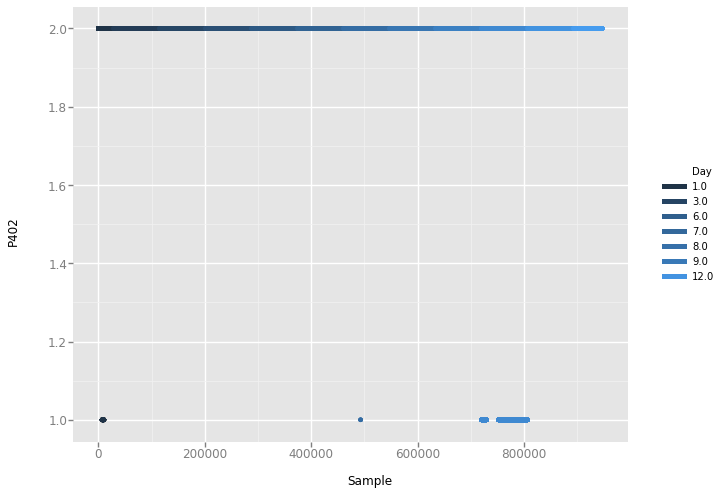

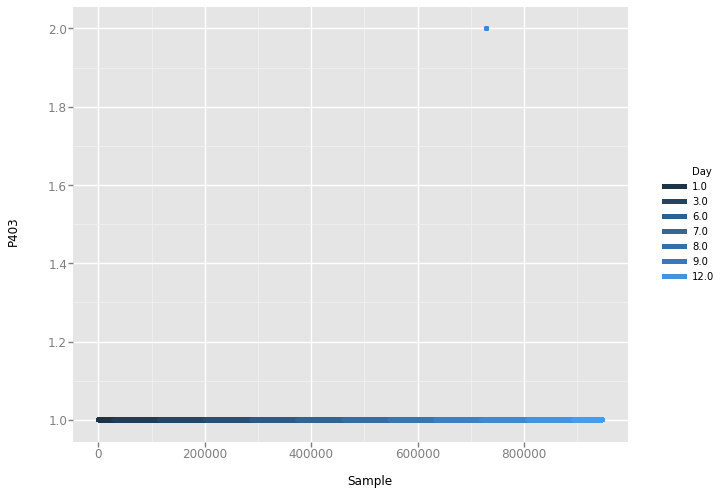

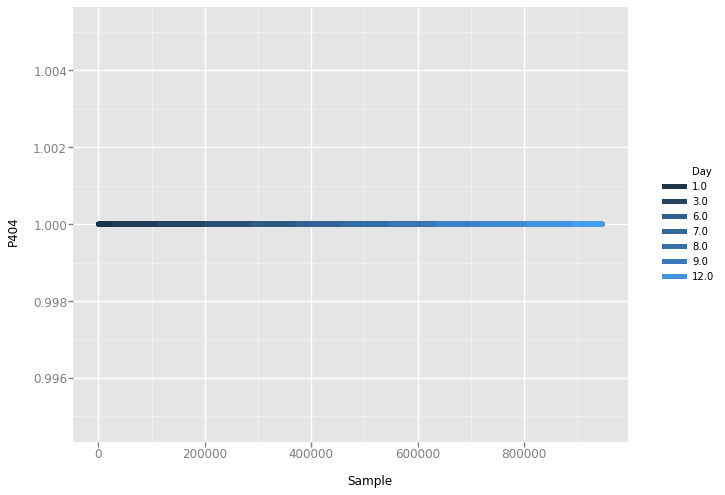

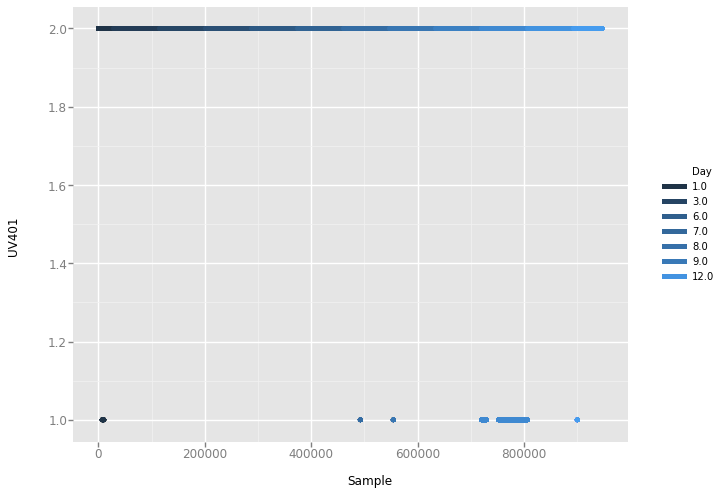

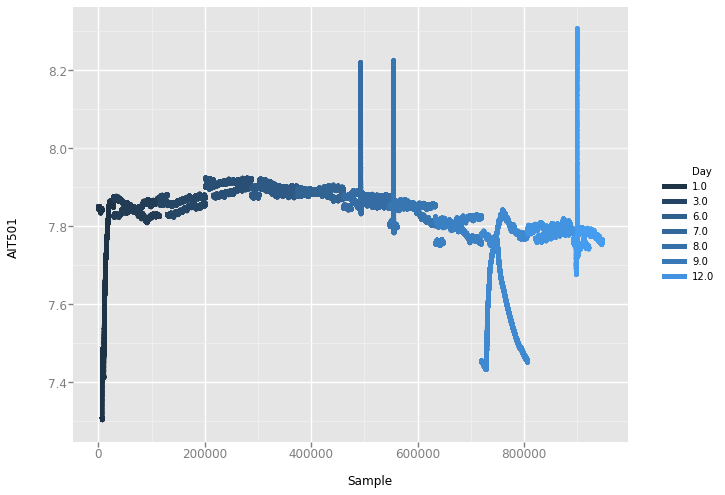

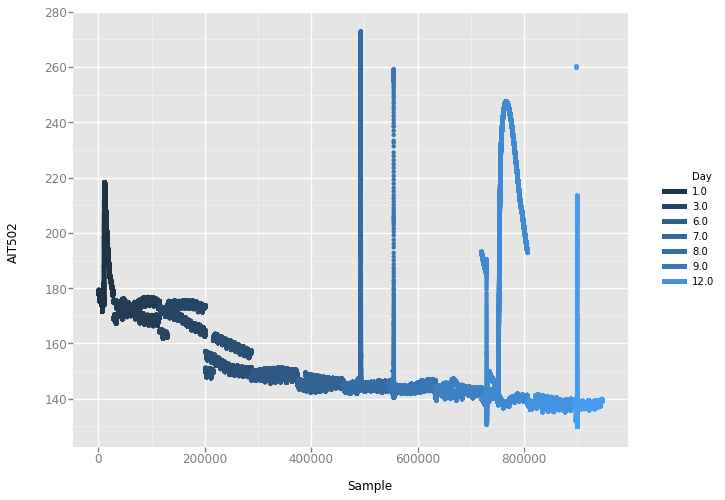

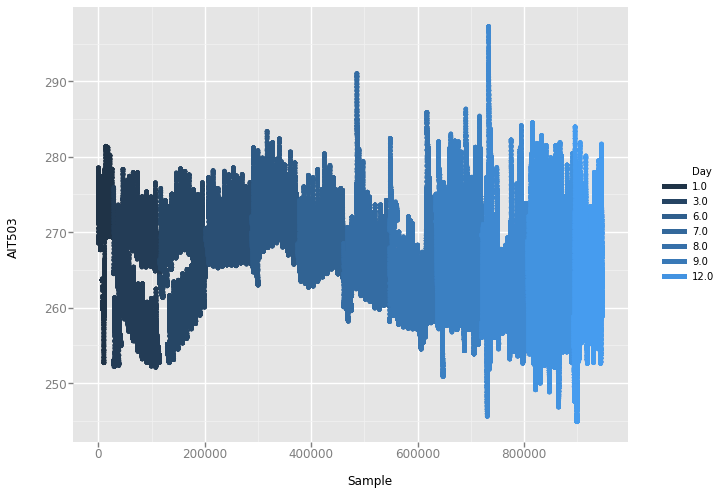

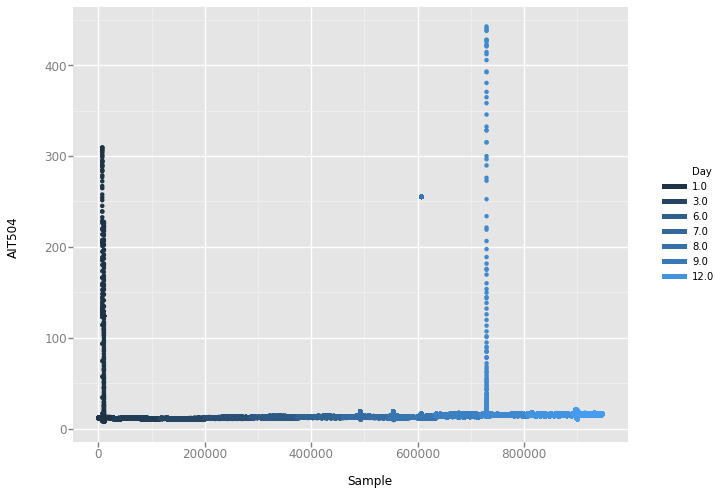

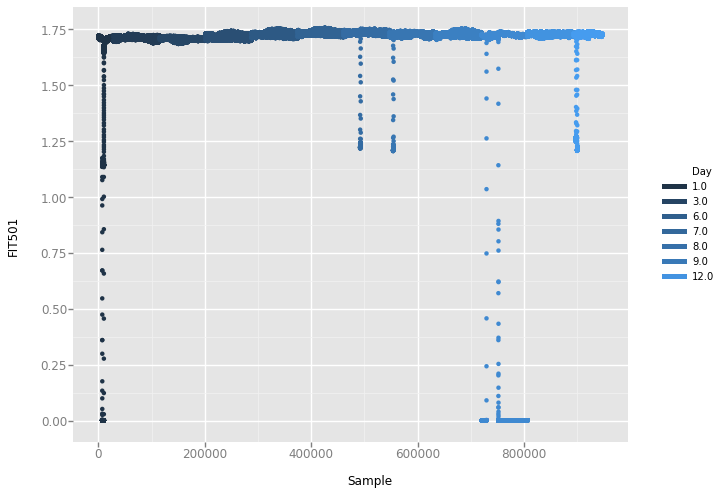

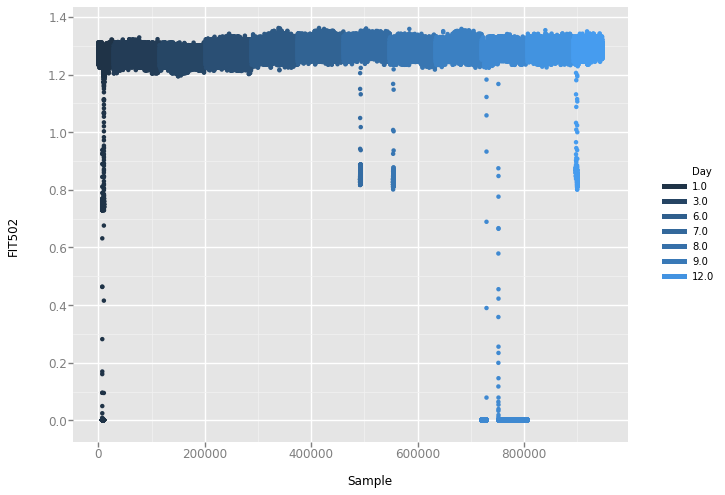

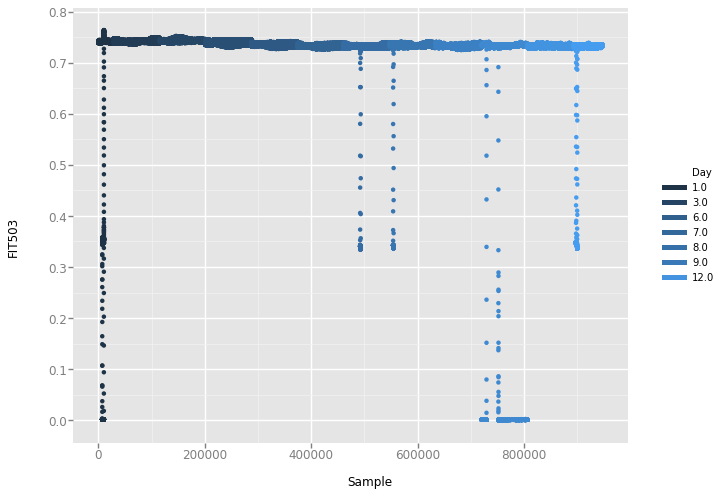

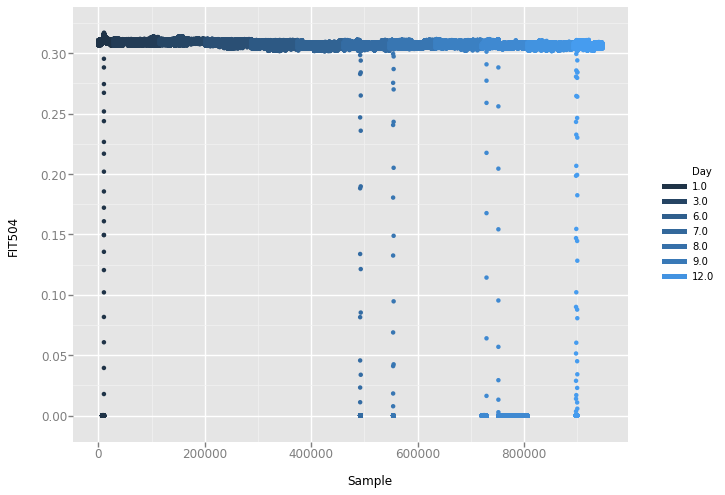

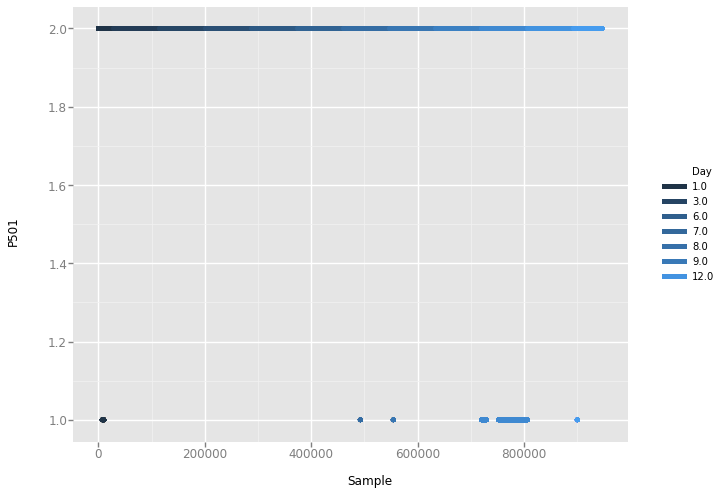

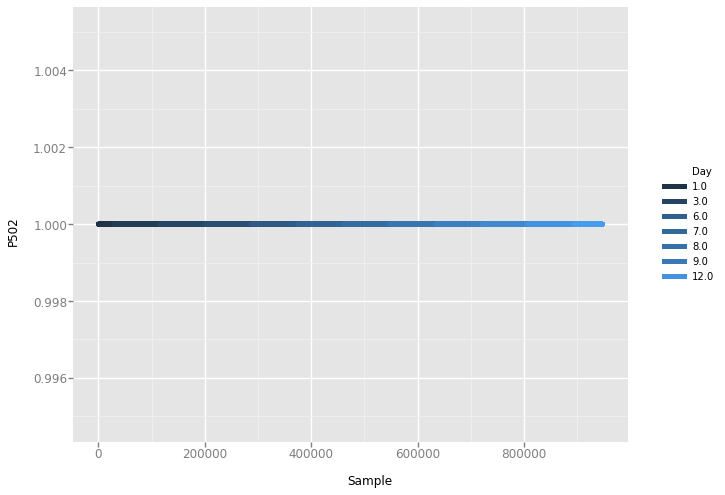

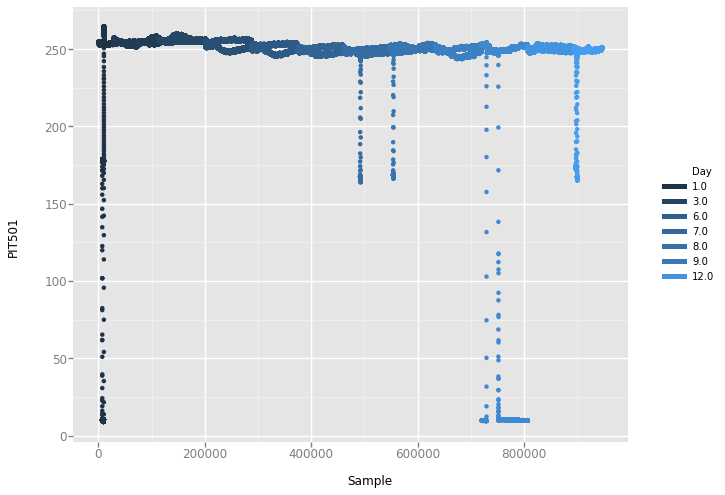

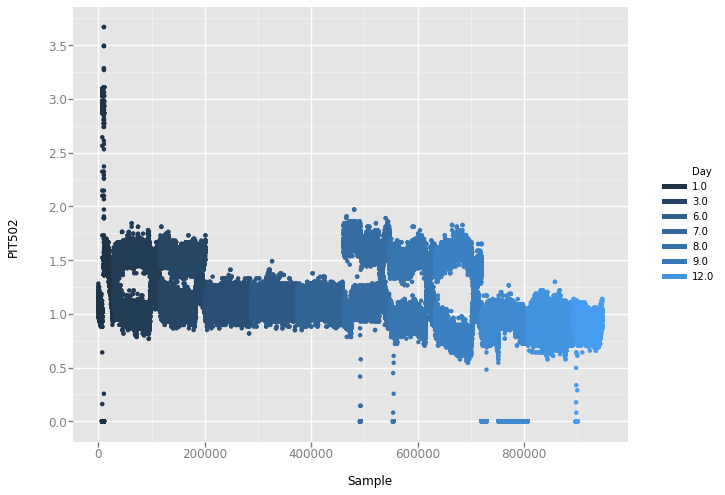

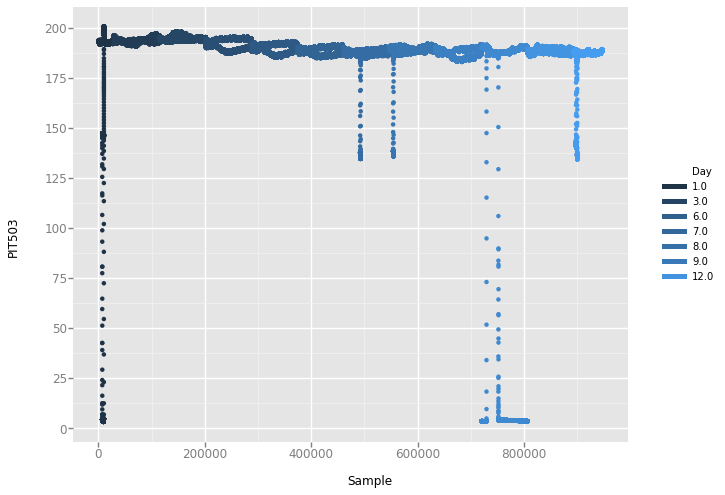

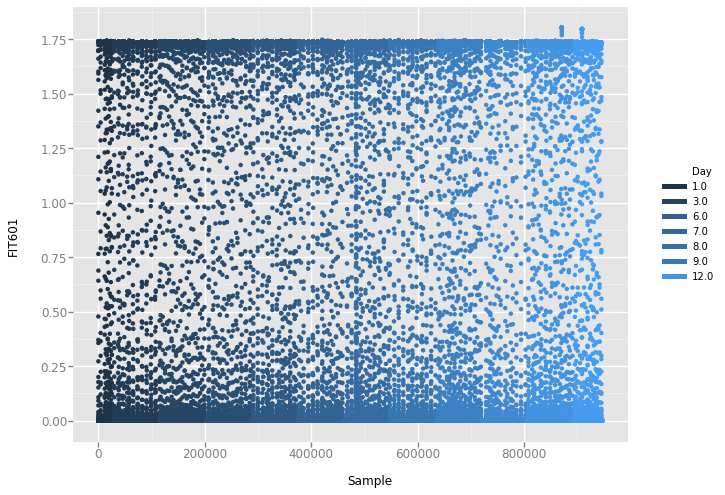

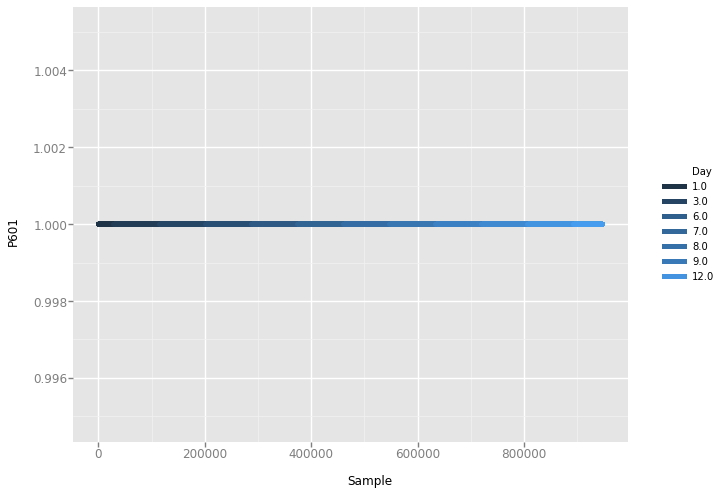

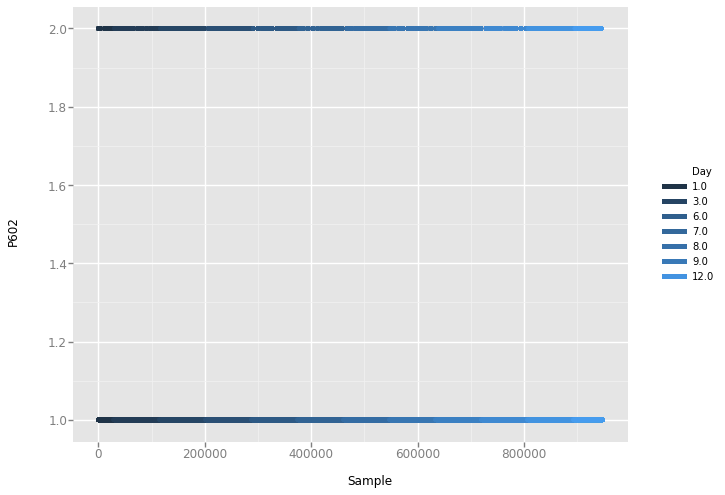

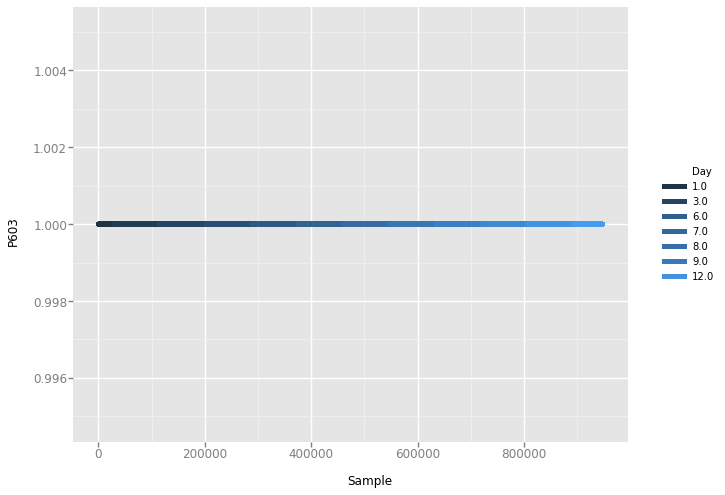

In [37]:
for feature in features:
    plot = ggplot(aes(x='Sample', y=feature, color='Day'), data=data) + \
    geom_point()
    plot.show()

### What's a normal day like?

In [ ]:
# Day 1 has some glitches, let's look into day 2 specifically
is_day2 = data['Day'] == 2
data_day2 = data[is_day2]
data_day2.shape

In [ ]:
for feature in features:
    plot = ggplot(aes(x='Sample', y=feature), data=data_day2) + \
    geom_point()
    plot.show()